哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [89]:
import pandas as pd 

In [90]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv

data_a = pd.read_csv('C:/Users/Administrator/Desktop/Python資料科學程式馬拉松/6.期末/不動產實價登錄/A_lvr_land_A.csv')
data_a.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN


In [91]:
data_b = pd.read_csv('C:/Users/Administrator/Desktop/Python資料科學程式馬拉松/6.期末/不動產實價登錄/B_lvr_land_A.csv')
data_b.head()

C:\Users\Administrator\anaconda\envs\vnpy_venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,西區,房地(土地+建物),臺中市西區美村路一段181~210號,28.34,住,NaN,NaN,1090331,土地1建物1車位0,五層,...,52925,NaN,0.0,0,NaN,RPVOMLLKNHPFFAB18CA,104.80,18.34,0.0,NaN
2,西區,房地(土地+建物),臺中市西區梅川西路一段91~120號,52.0,住,NaN,NaN,1090331,土地1建物1車位0,全,...,114379,NaN,0.0,0,NaN,RPPNMLMKNHPFFAB57CA,91.80,0.00,0.0,NaN
3,南區,房地(土地+建物)+車位,臺中市南區建國南路一段211~240號,23.4,住,NaN,NaN,1090418,土地1建物1車位1,十一層,...,68162,坡道平面,24.05,0,NaN,RPUNMLMKNHPFFAB08CA,110.26,19.34,0.0,NaN
4,西區,房地(土地+建物),臺中市西區東興路三段91~120號,84.0,住,NaN,NaN,1090403,土地1建物1車位0,全,...,118142,NaN,0.0,0,NaN,RPSOMLMKNHPFFAB97CA,211.61,0.00,0.0,NaN


In [92]:
data_e = pd.read_csv('C:/Users/Administrator/Desktop/Python資料科學程式馬拉松/6.期末/不動產實價登錄/E_lvr_land_A.csv')
data_e.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,鼓山區,房地(土地+建物)+車位,高雄市鼓山區明倫路121~150號,17.2,商,NaN,NaN,1090221,土地1建物2車位1,一層，二層，騎樓,...,137122,升降機械,0.0,0,NaN,RPTNMLLKNHPFFAE18CA,139.45,4.14,0.0,NaN
2,鼓山區,房地(土地+建物)+車位,高雄市鼓山區昌盛路1~30號,7.55,商,NaN,NaN,1090410,土地1建物1車位1,七層,...,66133,坡道機械,0.0,800000,NaN,RPVNMLLKNHPFFAE38CA,46.55,6.41,0.0,NaN
3,鹽埕區,建物,高雄市鹽埕區北斗街1~30號,0.0,NaN,NaN,NaN,1090511,土地0建物1車位0,九層,...,13578,NaN,0.0,0,NaN,RPUNMLMKNHPFFAE38CA,33.22,1.85,0.0,NaN
4,鹽埕區,建物,高雄市鹽埕區大義街91~120號,0.0,NaN,NaN,NaN,1081216,土地0建物1車位0,三層,...,5042,NaN,0.0,0,NaN,RPUNMLOKNHPFFAE58CA,26.85,0.00,0.0,NaN


In [93]:
data_f = pd.read_csv('C:/Users/Administrator/Desktop/Python資料科學程式馬拉松/6.期末/不動產實價登錄/F_lvr_land_A.csv')
data_f.head()

C:\Users\Administrator\anaconda\envs\vnpy_venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,板橋區,房地(土地+建物),新北市板橋區南雅東路1~30號,9.76,商,NaN,NaN,1090405,土地2建物1車位0,六層,...,125589,NaN,0.0,0,含增建或未登記建物。;,RPQNMLMKNHPFFAF08CA,47.45,0.0,8.10,NaN
2,板橋區,房地(土地+建物)+車位,新北市板橋區縣民大道三段270巷1~30號,24.18,工,NaN,NaN,1090401,土地1建物1車位1,八層,...,113039,坡道平面,38.09,0,含增建或未登記建物。;,RPRNMLMKNHPFFAF18CA,116.29,0.0,11.80,NaN
3,板橋區,房地(土地+建物),新北市板橋區南雅南路一段1~30號,3.2,商,NaN,NaN,1090316,土地1建物1車位0,十一層,...,99489,NaN,0.0,0,含增建或未登記建物。;,RPTNMLMKNHPFFAF38CA,23.02,0.0,4.94,NaN
4,板橋區,房地(土地+建物),新北市板橋區金門街103巷1~30號,32.58,住,NaN,NaN,1090410,土地2建物1車位0,二層,...,88944,NaN,0.0,0,含增建或未登記建物。;,RPSNMLNKNHPFFAF38CA,80.55,0.0,16.14,NaN


In [94]:
#2.刪除csv中英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
data_a = data_a.iloc[1:]  # 從第一列開始取資料
data_a.head(1)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN


In [95]:
data_b = data_b.iloc[1:]
data_b.head(1)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,西區,房地(土地+建物),臺中市西區美村路一段181~210號,28.34,住,NaN,NaN,1090331,土地1建物1車位0,五層,...,52925,NaN,0.0,0,NaN,RPVOMLLKNHPFFAB18CA,104.8,18.34,0.0,NaN


In [96]:
data_e = data_e.iloc[1:]
data_e.head(1)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,鼓山區,房地(土地+建物)+車位,高雄市鼓山區明倫路121~150號,17.2,商,NaN,NaN,1090221,土地1建物2車位1,一層，二層，騎樓,...,137122,升降機械,0.0,0,NaN,RPTNMLLKNHPFFAE18CA,139.45,4.14,0.0,NaN


In [97]:
data_f = data_f.iloc[1:]
data_f.head(1)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,板橋區,房地(土地+建物),新北市板橋區南雅東路1~30號,9.76,商,NaN,NaN,1090405,土地2建物1車位0,六層,...,125589,NaN,0.0,0,含增建或未登記建物。;,RPQNMLMKNHPFFAF08CA,47.45,0.0,8.1,NaN


In [98]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
data_a['city'] = 'Taipei'    # a 資料'city'為台北
data_b['city'] = 'Taichung'  # b 資料'city'為台中
data_e['city'] = 'Kaohsiung' # e 資料'city'為高雄
data_f['city'] = 'New_Taipei'# f 資料'city'為新北

In [99]:
print(data_a['city'].head(1))
print(data_b['city'].head(1))
print(data_e['city'].head(1))
print(data_f['city'].head(1))

1    Taipei
Name: city, dtype: object
1    Taichung
Name: city, dtype: object
1    Kaohsiung
Name: city, dtype: object
1    New_Taipei
Name: city, dtype: object


In [100]:
#4. 將以上四份資料運用pd.concat()串接
all_data = pd.concat([data_a,data_b,data_e,data_f],axis=0)
all_data.head(5)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [101]:
# 定義新columns名稱，例如將'鄉鎮市區'改為'towns'

columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
# 欄位名稱
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
# 設定欄位資料屬性
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [102]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
analysis_data = all_data.rename(columns=columns_mapping)
analysis_data.head(1)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei


In [103]:
analysis_data.main_use.head(1)

1    住家用
Name: main_use, dtype: object

In [104]:
# 取出 analysis_data 中 main_use主要為住家用者
analysis_data.loc[analysis_data.main_use=='住家用']

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19804,三峽區,房地(土地+建物),大義路181~210號,14.86,其他,NaN,NaN,1090805,土地1建物1車位0,三層,...,NaN,0.0,0,NaN,RPSNMLSJRHPFFIF47DA,89.63,0.48,9.53,有,New_Taipei
19805,鶯歌區,房地(土地+建物)+車位,鶯桃路129巷12弄1~30號,20.78,其他,NaN,NaN,1090722,土地1建物1車位1,四層,...,坡道平面,0.0,0,NaN,RPTNMLSJRHPFFIF57DA,86.46,0.40,9.42,有,New_Taipei
19806,樹林區,房地(土地+建物)+車位,長壽街1~30號,32.34,其他,NaN,NaN,1090810,土地1建物1車位1,十二層,...,坡道平面,42.96,0,NaN,RPUNMLSJRHPFFIF67DA,114.37,1.54,11.19,有,New_Taipei
19807,樹林區,房地(土地+建物),中華路271~300號,7.62,其他,NaN,NaN,1090725,土地1建物1車位0,三層,...,NaN,0.0,0,夾層;,RPXNMLSJRHPFFIF97DA,47.40,0.00,6.30,有,New_Taipei


In [105]:
# 取出 analysis_data 中 main_use主要為住家用者，並針對analysis_columns設定的欄位分析
analysis_data.loc[analysis_data.main_use=='住家用',analysis_columns]

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
3,Taipei,文山區,住家用,其他,23800000,131.14999999999998,78.80,1090418,181472,3,2,2
4,Taipei,中正區,住家用,商,11430000,38.17,18.34,1090413,299450,1,1,1
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19804,New_Taipei,三峽區,住家用,其他,14350000,141.6,89.63,1090805,101342.0,3,2,2
19805,New_Taipei,鶯歌區,住家用,其他,7400000,151.58,86.46,1090722,48819.0,4,2,2
19806,New_Taipei,樹林區,住家用,其他,23800000,218.37,114.37,1090810,108989.0,4,4,2
19807,New_Taipei,樹林區,住家用,其他,6080000,64.27,47.40,1090725,94601.0,2,1,1


In [106]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
analysis_data = analysis_data.loc[(analysis_data.main_use=='住家用')&(analysis_data.use_zoning=='住'),analysis_columns].dropna()
analysis_data.head(1)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2


In [107]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 11512
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB


In [108]:
analysis_data = analysis_data.astype(columns_type)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 11512
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   int32  
 5   building_area_square_meter  7802 non-null   float64
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   float64
 9   room_number                 7802 non-null   int32  
 10  hall_number                 7802 non-null   int32  
 11  health_number               7802 non-null   int32  
dtypes: float64(3), int32(4), object(5)
memory usage: 670.5+ KB


In [109]:
analysis_data['tx_dt'][1]

'1090406'

In [110]:
# 4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引

# 新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
analysis_data['tx_dt_year'] = analysis_data['tx_dt'].apply(lambda x: int(x[:-4]))
print(analysis_data['tx_dt_year'].head(5))

# 
analysis_data = analysis_data.loc[(analysis_data.tx_dt_year>=109)&
                                  (analysis_data.room_number>=1)&
                                  (analysis_data.room_number<=5)&
                                  (analysis_data.hall_number>=1)&
                                  (analysis_data.hall_number<=2)]

analysis_data = analysis_data.reset_index(drop=True)
analysis_data.head(5)

1    109
2    109
5    109
7    109
8    109
Name: tx_dt_year, dtype: int64


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [112]:
# 建立新特徵
# 1.建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 並輸出至新增的'building_area_square_feet'欄位

analysis_data['building_area_square_feet'] = analysis_data.building_area_square_meter*0.3025

In [113]:
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 並輸出至新增的'main_building_area_square_feet'欄位

analysis_data['main_building_area_square_feet'] = analysis_data.main_building_area*0.3025

In [114]:
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
# 並輸出至新增的'unit_price_square_feet'欄位

analysis_data['unit_price_square_feet'] = analysis_data.unit_price/0.3025

In [115]:
analysis_data.head(1)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066


In [116]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?

analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.0,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,109.0,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,0.0,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,109.0,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,109.0,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,109.0,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,109.0,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


#### 觀察到有總價total_price最小值為0還有主建物面積main_building_area最小為0的，進一步將其拿掉

In [117]:
# 選取analysis_data資料，其中'total_price' 及 'main_building_area'不等於0

analysis_data = analysis_data.loc[(analysis_data.total_price!=0)&(analysis_data.main_building_area!=0)]
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.0,6854.000000,6854.000000,6.854000e+03
mean,1.141669e+07,121.768404,82.565725,94548.453020,2.849869,1.793114,1.733149,109.0,36.834942,24.976132,3.125569e+05
std,1.161669e+07,62.849105,36.940424,58374.690321,0.898343,0.405103,0.680869,0.0,19.011854,11.174478,1.929742e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,109.0,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.012500,61.062500,53597.250000,2.000000,2.000000,1.000000,109.0,25.111281,18.471406,1.771810e+05
50%,8.600000e+06,109.405000,79.110000,79742.500000,3.000000,2.000000,2.000000,109.0,33.095012,23.930775,2.636116e+05
75%,1.330000e+07,147.445000,95.970000,118880.000000,3.000000,2.000000,2.000000,109.0,44.602112,29.030925,3.929917e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [122]:
# 找出'city'為台北市的資料
analysis_data.loc[analysis_data.city=='Taipei'][1:3]

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.43545,494406.61157
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.86885,488677.68595


In [123]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，分析時價登入總價(total_price)與台北市資料的相關性
# 建物移轉總面積平方公尺、主建物面積、建物移轉總面積坪、主建物面積坪

# 2. 資料切片切出city欄位為台北市的資料，分析單價元坪(unit_price_square_feet)與台北市資料的相關性
# 單價元平方公尺

analysis_data.loc[analysis_data.city=='Taipei'].corr()[['total_price','unit_price_square_feet']]

,total_price,unit_price_square_feet
total_price,1.000000,0.581290
building_area_square_meter,0.864627,0.218185
main_building_area,0.710515,0.112488
unit_price,0.581290,1.000000
room_number,0.326441,-0.100062
hall_number,0.270787,0.004883
health_number,0.598832,0.128217
tx_dt_year,NaN,NaN
building_area_square_feet,0.864627,0.218185
main_building_area_square_feet,0.710515,0.112488


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

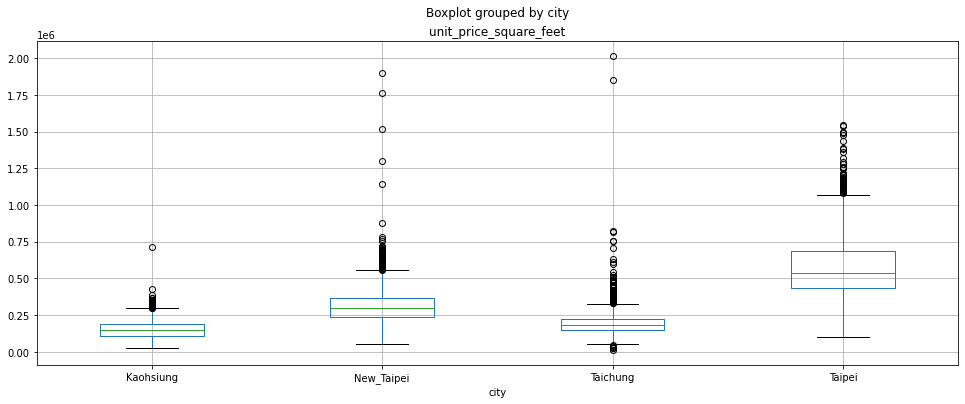

In [124]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的城市
#台北市

analysis_data.boxplot(column=['unit_price_square_feet'],by='city',figsize=(16,6))

<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

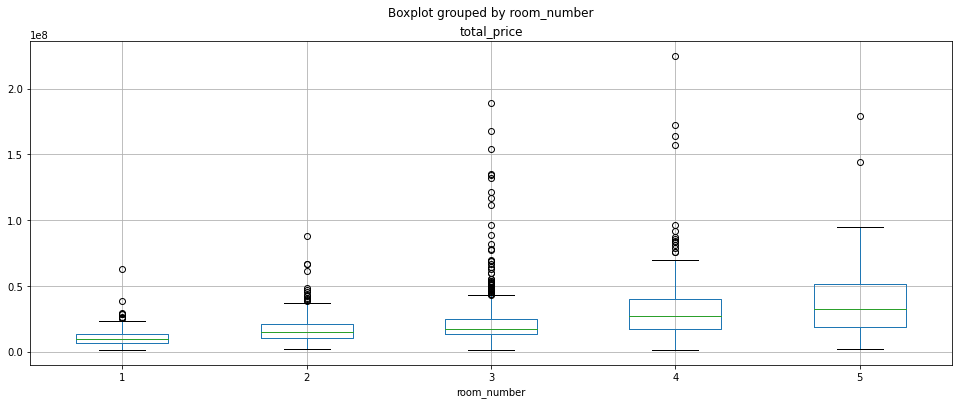

In [125]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
# 方法1
analysis_data.loc[analysis_data.city=='Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(16,6))

<AxesSubplot:xlabel='room_number', ylabel='total_price'>

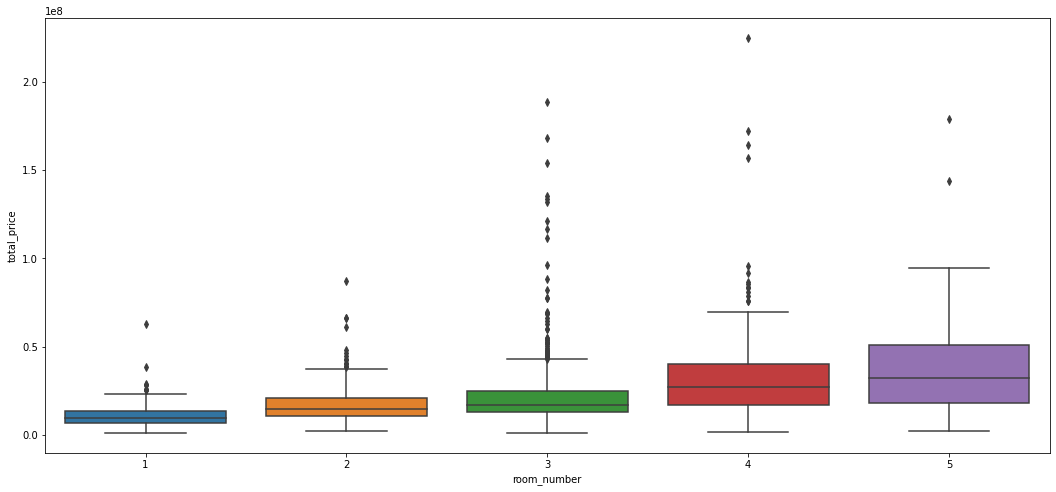

In [133]:
# 方法2
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,8))
sns.boxplot(data = analysis_data.loc[analysis_data.city=='Taipei'],x = 'room_number',y = 'total_price')

ANS：5房中位數最高

In [126]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
#大安區

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(analysis_data['towns'].values)
analysis_data['towns_2'] = le.transform(analysis_data['towns'].values)

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='towns_2'>

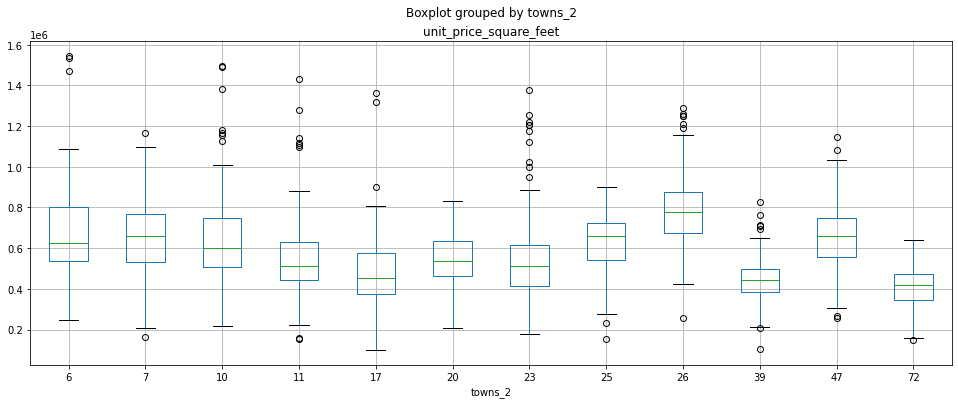

In [127]:
analysis_data.loc[analysis_data.city=='Taipei'].boxplot(column=['unit_price_square_feet'],by='towns_2',figsize=(16,6))

<AxesSubplot:xlabel='towns_2', ylabel='unit_price_square_feet'>

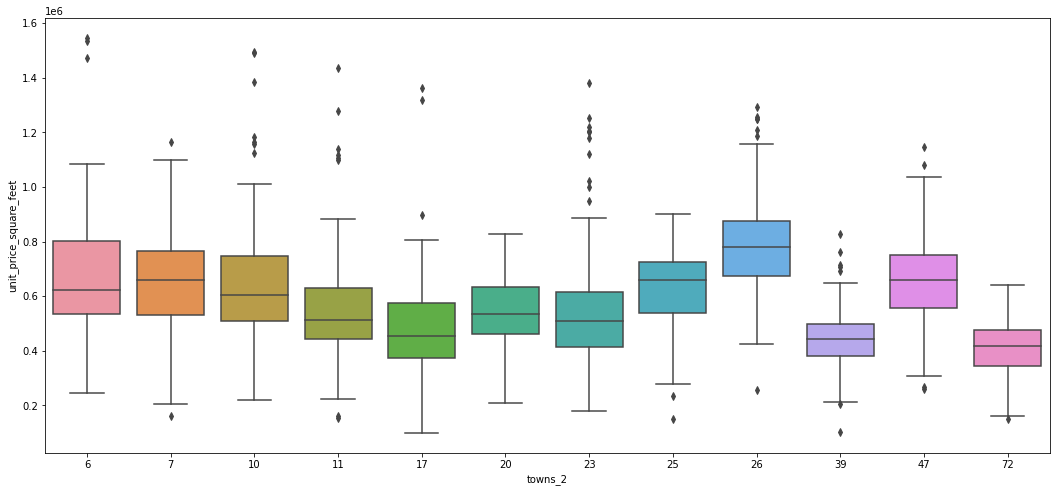

In [134]:
# 方法2
fig = plt.figure(figsize = (18,8))
sns.boxplot(data = analysis_data.loc[analysis_data.city=='Taipei'],x = 'towns_2',y = 'unit_price_square_feet')

In [128]:
le.inverse_transform([26])

array(['大安區'], dtype=object)

In [132]:
le.inverse_transform([72])

array(['萬華區'], dtype=object)